In [9]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Conv1D,Conv2D,Flatten,BatchNormalization,MaxPooling1D,Dropout,Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D,MaxPooling2D,ZeroPadding2D,AveragePooling2D
from tensorflow.keras.layers import Activation,Add,Reshape,Permute,LeakyReLU,UpSampling2D,Conv2DTranspose,Concatenate
from tensorflow.keras.layers import Lambda,InputSpec,Layer,Input,Add,ZeroPadding2D,UpSampling2D,MaxPooling2D,Conv2D,Bidirectional,LSTM
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam,SGD
import datetime
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score,recall_score,ConfusionMatrixDisplay
import os
# import flask
import json

time = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
# def load_dataset():

X_train = pd.read_pickle('../final_2M/reshape_df/train/data.pkl')
y_train = pd.read_pickle('../final_2M/reshape_df/train/labels.pkl')
X_test = pd.read_pickle('../final_2M/reshape_df/test/data.pkl')
y_test = pd.read_pickle('../final_2M/reshape_df/test/labels.pkl')
X_val = pd.read_pickle('../final_2M/reshape_df/val/data.pkl')
y_val = pd.read_pickle('../final_2M/reshape_df/val/labels.pkl')

In [2]:
def re_shape_3D(X_train,X_test,y_train,y_test,X_val,y_val):
    X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],1)
    X_test = X_test.reshape(len(X_test),X_test.shape[1],X_test.shape[2],1)
    X_val = X_val.reshape(len(X_val),X_val.shape[1],X_val.shape[2],1)
    return X_train,X_test,y_train,y_test,X_val,y_val
# define cnn model
def define_model_99(time,Xtrain,ytrain,Xtest,ytest,logdir,epochs=10,batch_size=128,lr =0.001):
    # load model
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(Xtrain.shape[1],Xtrain.shape[2],Xtrain.shape[3]),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(4,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # create data generator 
    time = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    logdir = logdir + time
    tensorboard_callback = TensorBoard(log_dir=logdir)
    calls = [tensorboard_callback,
            #  EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto'),
            #  ModelCheckpoint(filepath=f'models/{time}/model_{time}.h5',monitor='val_loss',save_best_only=True,mode='auto'),
            #  ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3,verbose=1,mode='auto',min_delta=0.0001,cooldown=0,min_lr=0)
            ]
    model.fit(Xtrain,ytrain,epochs=epochs,batch_size=batch_size,validation_data=(Xtest,ytest),callbacks=calls,verbose=1)
    return model


In [3]:
X_train,X_test,y_train,y_test,X_val,y_val = re_shape_3D(X_train,X_test,y_train,y_test,X_val,y_val)
os.mkdir(f'./models/{time}')
model = define_model_99(time,X_train,y_train,X_val,y_val,'./logs/')
model.save(f'./models/{time}/{time}.h5')

Epoch 1/10
315/315 [==============================] - 67s 170ms/step - loss: 0.4041 - accuracy: 0.7905 - val_loss: 7.2335e-07 - val_accuracy: 1.0000
Epoch 2/10
315/315 [==============================] - 51s 162ms/step - loss: 2.6480e-05 - accuracy: 1.0000 - val_loss: 2.5312e-07 - val_accuracy: 1.0000
Epoch 3/10
315/315 [==============================] - 51s 163ms/step - loss: 6.2459e-06 - accuracy: 1.0000 - val_loss: 1.0658e-10 - val_accuracy: 1.0000
Epoch 4/10
315/315 [==============================] - 52s 165ms/step - loss: 5.2332e-05 - accuracy: 1.0000 - val_loss: 1.0988e-07 - val_accuracy: 1.0000
Epoch 5/10
315/315 [==============================] - 52s 164ms/step - loss: 6.6827e-06 - accuracy: 1.0000 - val_loss: 2.7231e-08 - val_accuracy: 1.0000
Epoch 6/10
315/315 [==============================] - 52s 166ms/step - loss: 4.7946e-06 - accuracy: 1.0000 - val_loss: 9.9652e-09 - val_accuracy: 1.0000
Epoch 7/10
315/315 [==============================] - 52s 165ms/step - loss: 1.2564e-0

In [4]:
_,acc = model.evaluate(X_test,y_test)
print(acc)

70/70 [==============================] - 2s 21ms/step - loss: 5.8619e-10 - accuracy: 1.0000
1.0


In [5]:
model = load_model(f'./models/{time}/{time}.h5')
yhat = model.predict(X_test)
yhat = np.argmax(yhat,axis=-1)

70/70 [==============================] - 1s 14ms/step


In [13]:
cm = confusion_matrix(y_test,yhat)
print(cm)

[[496   0   0   0]
 [  0 497   0   0]
 [  0   0 500   0]
 [  0   0   0 744]]


Text(0.5, 1.0, 'Confusion matrix')

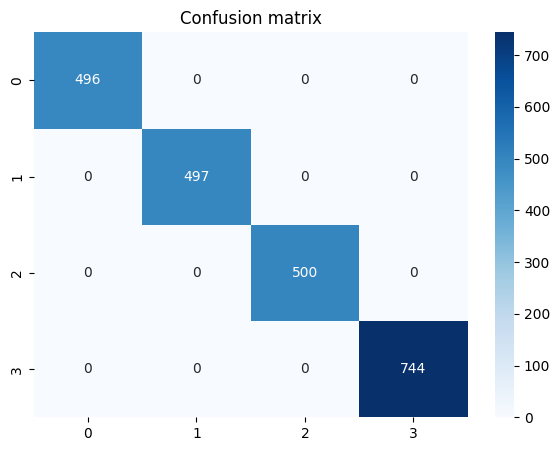

In [20]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
plt.title('Confusion matrix')